In [10]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
from dateutil.relativedelta import relativedelta 
from matplotlib.ticker import MaxNLocator

In [11]:
# import csv file 
fileName = 'logbook_climbs.csv'
df = pd.read_csv( fileName, parse_dates=True)

In [12]:
# convert data to useable format
df['date'] = pd.to_datetime(df['date'])  
cols = df.columns.tolist()  

# convert Hueco/yds scale to numeric values
df['numeric_grade']= 0  # initialize grade column 
for iters,rows in df.iterrows():
    a = df.loc[iters,'rating']

    if a[0] == "V": 
        df.loc[iters,'numeric_grade'] = 4 + 0.1*float(a[1]) 
    elif a[0] == "C": 
        df.loc[iters,'numeric_grade'] = 6 + 0.1*float(a[1]) 
    else: 
        b =  a.split('.')[1] 
        if a[-1].isdigit() == True:
            d = float(b)/100 +  (0.1 -(float(b)/100 ) )*0.75   
        else:   
            c = float( a.split('.')[1][0:2] )/100
            quart =  (ord( a.split('.')[1][2])-97 )/400
            d = c+quart
        df.loc[iters,'numeric_grade'] = 5 + float(d) 

In [13]:
# set plot parameters
months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b")
dStart = datetime.datetime(2018,1,1)  
dEnd = datetime.datetime.now() +  datetime.timedelta(days=5)
m_textsz = 5
m_textang = 50

yLow = 5.095 # please keep fixed 
yHigh = 5.125 # vary to include higher grades 

# custom ticks  (still hacky) 
xticks = pd.date_range(start=dStart, end=dEnd, freq='M')
yticks = np.append( [5.095,5.0975], np.arange(5.10, yHigh+0.0025,0.0025 ) )
yticklabs = ['5.8','5.9','5.10a','5.10b','5.10c','5.10d','5.11a','5.11b','5.11c','5.11d','5.12a','5.12b','5.12c','5.12d','5.13a']

#histogram stuff
binEdge = np.arange( yLow , yHigh + 0.005,0.0025) - 0.00125
tickX = binEdge[:-2]
labels = yticklabs
dt = datetime.timedelta(days=3) 

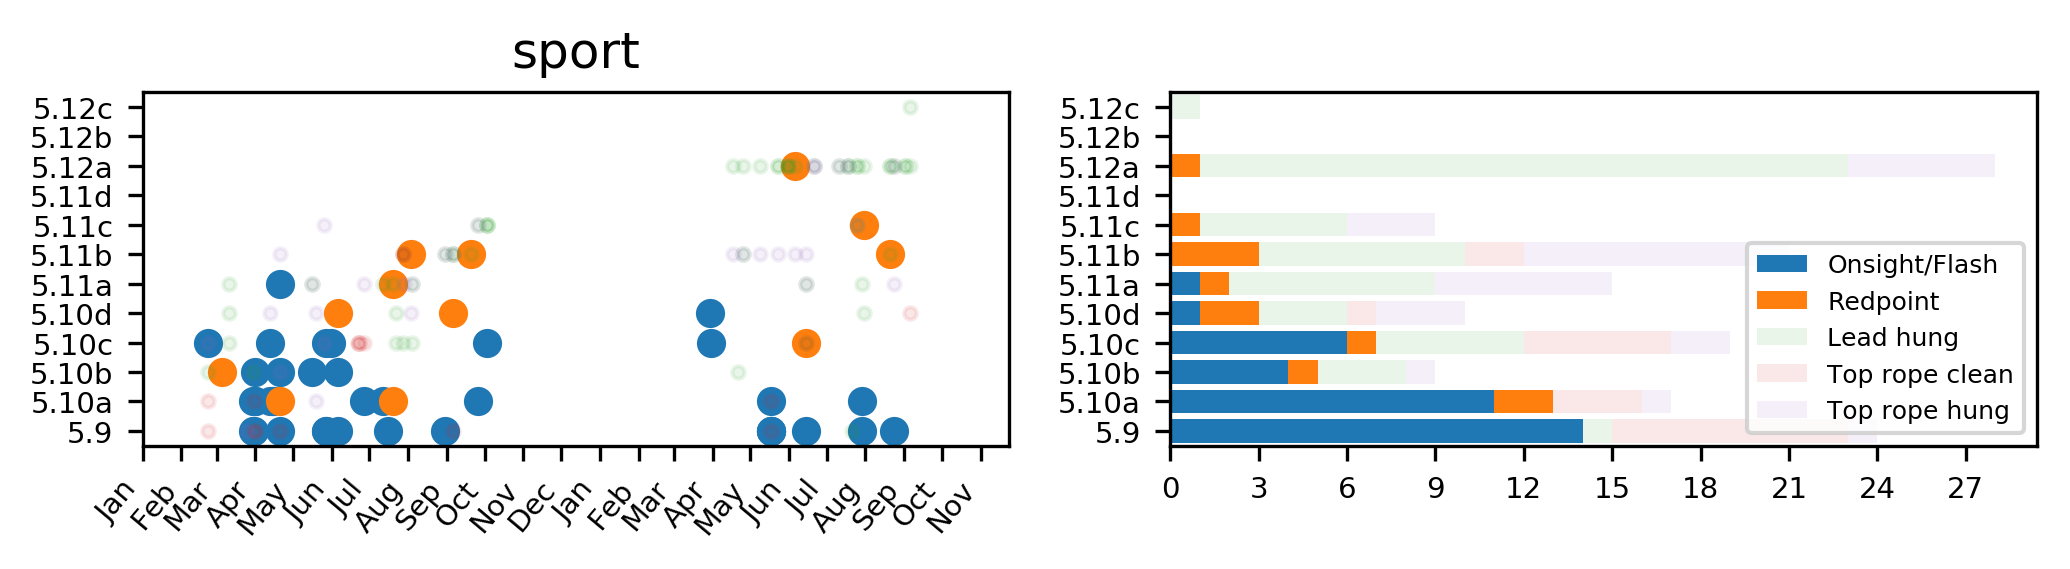

In [14]:
ax = plt.figure(figsize=(7,2), dpi=300).add_subplot(121)

df[(df['type'] == 'sport')& ((df['style']==1) |(df['style']==2)) ].plot(ax=ax, x = 'date',y='numeric_grade',style='o', xticks=xticks.to_pydatetime(), yticks = yticks)
df[(df['type'] == 'sport')& (df['style']==3)  ].plot(ax=ax, x = 'date',y='numeric_grade',style='o', xticks=xticks.to_pydatetime(), yticks = yticks)
df[(df['type'] == 'sport')& (df['lead']==1 )& (df['style']==0 )  ].plot(ax=ax, x = 'date',y='numeric_grade',style='.',alpha = 0.1, xticks=xticks.to_pydatetime(), yticks = yticks)
df[(df['type'] == 'sport')&  (df['style']==5 )  ].plot(ax=ax, x = 'date',y='numeric_grade',style='.',alpha = 0.1, xticks=xticks.to_pydatetime(), yticks = yticks)
df[(df['type'] == 'sport')& (df['lead']==0 )&  (df['style']==0 )  ].plot(ax=ax, x = 'date',y='numeric_grade',style='.',alpha = 0.1, xticks=xticks.to_pydatetime(), yticks = yticks )
 
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.set_yticklabels(yticklabs);
ax.set_ylim( yLow+ 0.00125, yHigh+ 0.00125)
ax.set_xlim( dStart,dEnd)
ax.set_xlabel('')
ax.set_title('sport')
ax.legend_.remove()
ax.tick_params(labelsize=7) 
plt.xticks(rotation=m_textang)

ax2 = plt.subplot(122)

n1,b1 = np.histogram( df[(df['type'] == 'sport')& ((df['style']==1) |(df['style']==2)) ]['numeric_grade'].values, bins=binEdge )
n15,b15 = np.histogram( df[(df['type'] == 'sport')& (df['style']==3)  ]['numeric_grade'].values, bins=binEdge )
n2,b2 = np.histogram(df[(df['type'] == 'sport')& (df['lead']==1 )& (df['style']==0 )  ]['numeric_grade'].values, bins=binEdge )
n3,b3 = np.histogram( df[(df['type'] == 'sport')&  (df['style']==5 )  ]['numeric_grade'].values, bins=binEdge )
n4,b4 = np.histogram( df[(df['type'] == 'sport')& (df['lead']==0 )&  (df['style']==0 )  ]['numeric_grade'].values, bins=binEdge )

plt.barh(b1[:-1],n1,0.002)
plt.barh(b2[:-1],n15,0.002,left = n1)

plt.barh(b2[:-1],n2,0.002,left = n1+n15, alpha = 0.1)
plt.barh(b3[:-1],n3,0.002,left = n1+n15+n2, alpha = 0.1)
plt.barh(b4[:-1],n4,0.002,left = n1+n15+n2+n3, alpha = 0.1)
plt.yticks(tickX)
ax2.set_yticklabels(labels)
ax2.tick_params(labelsize=7)
ax2.set_ylim( yLow  ,yHigh)
ax2.legend(['Onsight/Flash','Redpoint','Lead hung','Top rope clean','Top rope hung'], prop={'size': 6})
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()

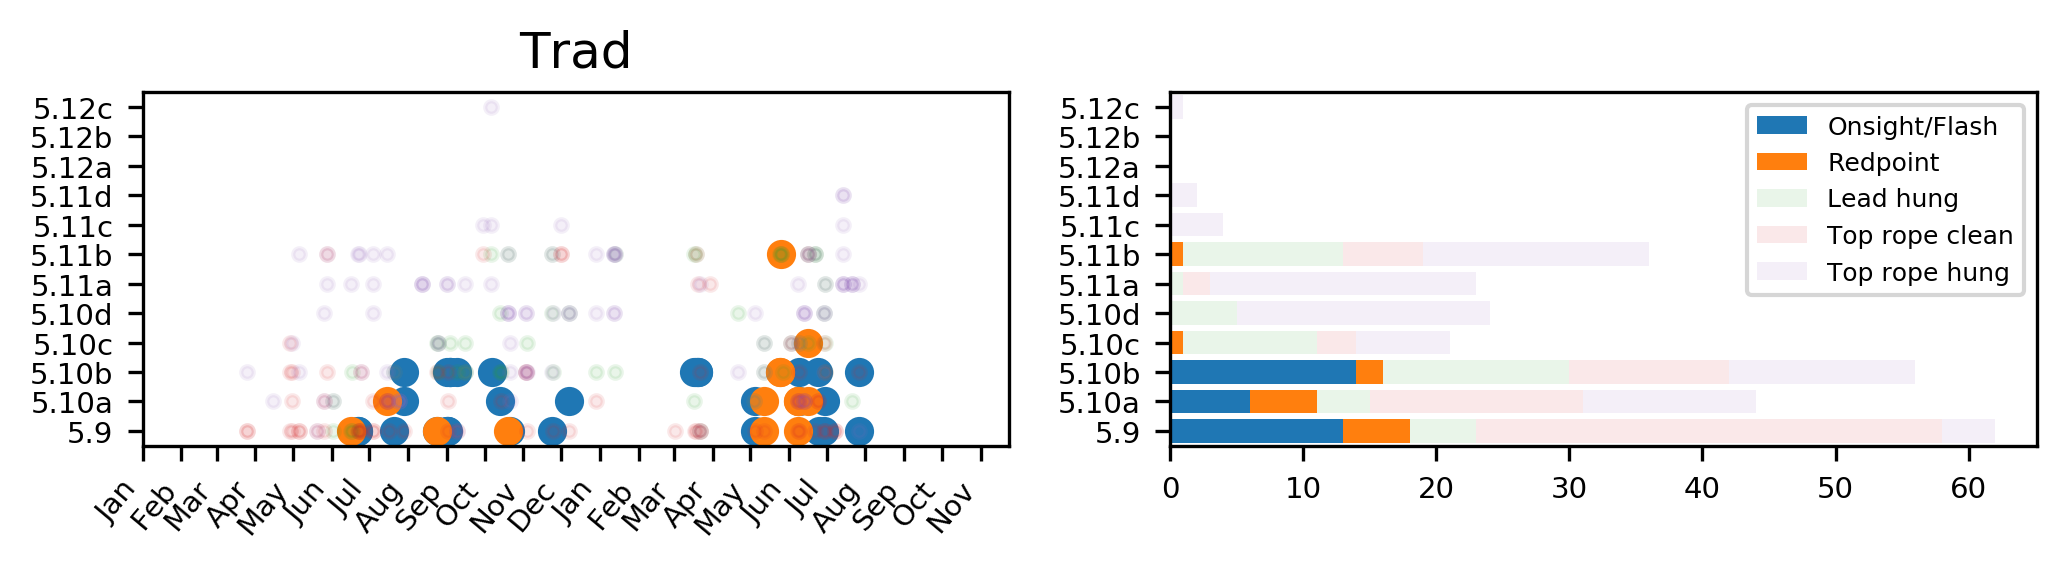

In [18]:
ax = plt.figure(figsize=(7,2), dpi=300).add_subplot(121)

df[(df['type'] == 'trad')& (df['lead']==1 )&((df['style']==1) |(df['style']==2)) ].plot(ax=ax, x = 'date',y='numeric_grade',style='o', xticks=xticks.to_pydatetime(), yticks = yticks)
df[(df['type'] == 'trad')& (df['lead']==1 )&(df['style']==3)  ].plot(ax=ax, x = 'date',y='numeric_grade',style='o', xticks=xticks.to_pydatetime(), yticks = yticks)
df[(df['type'] == 'trad')& (df['lead']==1 )& (df['style']==0 )  ].plot(ax=ax, x = 'date',y='numeric_grade',style='.',alpha = 0.1, xticks=xticks.to_pydatetime(), yticks = yticks)
df[(df['type'] == 'trad')&  (df['style']==5 )  ].plot(ax=ax, x = 'date',y='numeric_grade',style='.',alpha = 0.1, xticks=xticks.to_pydatetime(), yticks = yticks)
df[(df['type'] == 'trad')& (df['lead']==0 )&  (df['style']==0 )  ].plot(ax=ax, x = 'date',y='numeric_grade',style='.',alpha = 0.1, xticks=xticks.to_pydatetime(), yticks = yticks)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.set_yticklabels(yticklabs);
ax.set_ylim( yLow+ 0.00125, yHigh+ 0.00125)
ax.set_xlim( dStart,dEnd)
ax.set_xlabel('')
ax.set_title('Trad')
ax.legend_.remove()
ax.tick_params(labelsize=7)
plt.xticks(rotation=m_textang)
 
ax2 = plt.subplot(122)

n1,b1 = np.histogram( df[(df['type'] == 'trad')& (df['lead']==1 )&((df['style']==1) |(df['style']==2)) ]['numeric_grade'].values, bins=binEdge )
n15,b15 = np.histogram( df[(df['type'] == 'trad')&(df['lead']==1 )& (df['style']==3)  ]['numeric_grade'].values, bins=binEdge )
n2,b2 = np.histogram(df[(df['type'] == 'trad')& (df['lead']==1 )& (df['style']==0 )  ]['numeric_grade'].values, bins=binEdge )
n3,b3 = np.histogram( df[(df['type'] == 'trad')&  (df['style']== 5 )  ]['numeric_grade'].values, bins=binEdge )
n4,b4 = np.histogram( df[(df['type'] == 'trad')& (df['lead']==0 )&  (df['style']==0 )  ]['numeric_grade'].values, bins=binEdge )

plt.barh(b1[:-1],n1,0.002)
plt.barh(b2[:-1],n15,0.002,left = n1)
plt.barh(b2[:-1],n2,0.002,left = n1+n15, alpha = 0.1)
plt.barh(b3[:-1],n3,0.002,left = n1+n15+n2, alpha = 0.1)
plt.barh(b4[:-1],n4,0.002,left = n1+n15+n2+n3, alpha = 0.1)
plt.yticks(tickX)
ax2.set_yticklabels(labels)
ax2.tick_params(labelsize=7)
ax2.set_ylim( yLow,yHigh)
ax2.legend(['Onsight/Flash','Redpoint','Lead hung','Top rope clean','Top rope hung'], prop={'size': 6})
plt.tight_layout() 

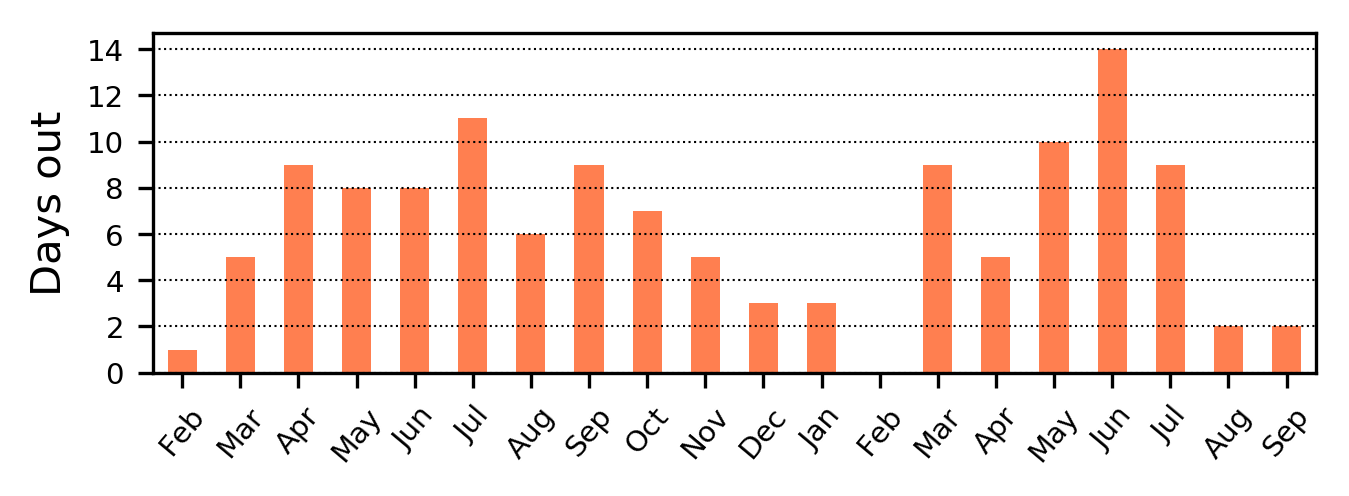

In [110]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

n_months = diff_month( datetime.datetime.now() , datetime.datetime(2018,1,1)   )

monthStarts = pd.date_range( datetime.datetime(2018,1,1)  , periods = n_months,  dtype='datetime64[ns]',freq='M'   )  + datetime.timedelta(days=1)
df_f = pd.DataFrame(index=monthStarts,columns= ['Days out'])
df_f.index.name = 'Month'
monthNames = [item.strftime('%b') for item in df_f.index]

ax = plt.figure(figsize=(5,1.5), dpi=300).add_subplot(111) 
for firstDay in monthStarts:
    df_f.loc[firstDay,'Days out'] =  df[( df['date']>=firstDay) & ( df['date']< (firstDay+ relativedelta(months=1) ) )]['date'].unique().shape[0]

df_f.plot.bar( ax=ax, y='Days out' , color='coral')
ax.set_xticklabels(monthNames)
ax.legend_.remove()
plt.xticks(rotation=m_textang)
ax.set_xlabel('')
ax.set_ylabel('Days out')
ax.tick_params(labelsize=7)
ax.grid(axis='y',linestyle = ':',zorder=0,color = 'k',linewidth=0.5)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

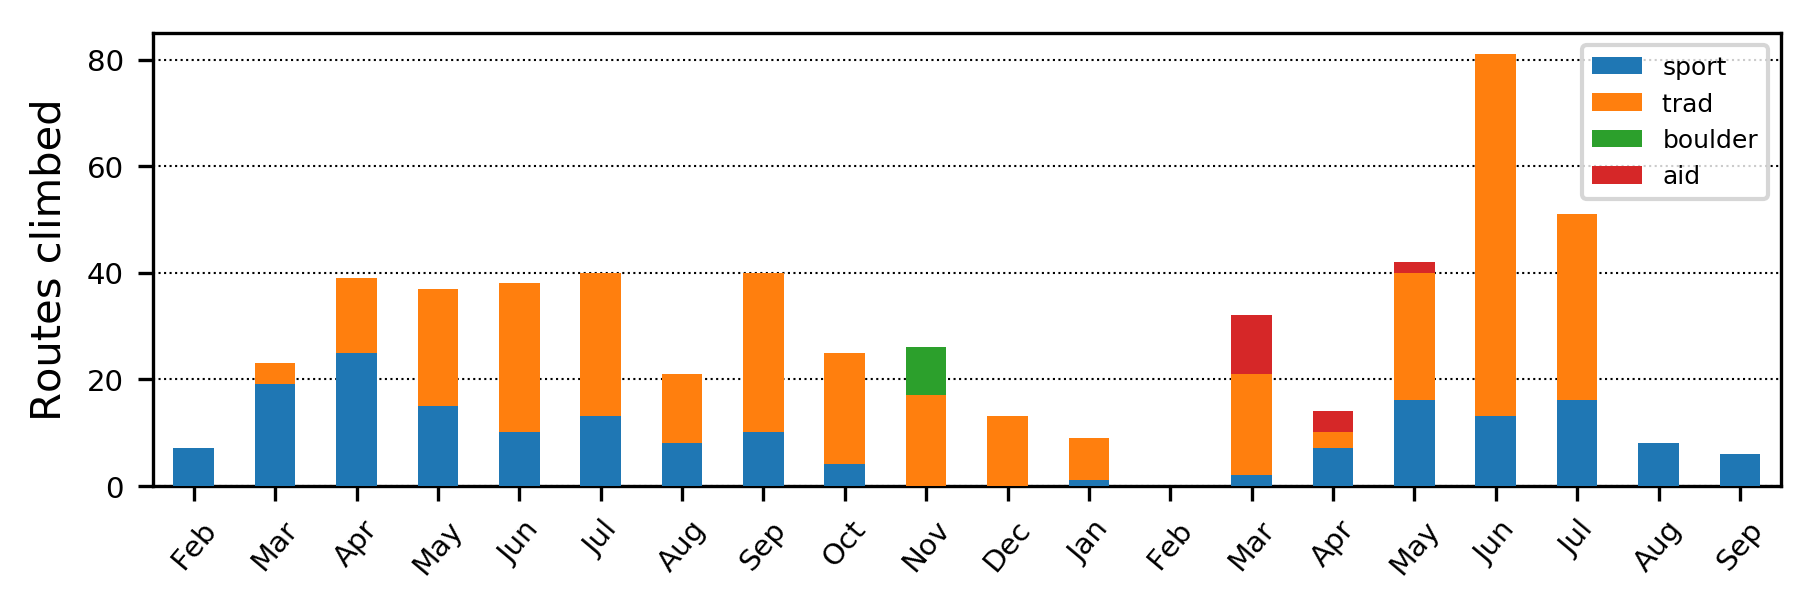

In [48]:
monthStarts = pd.date_range( datetime.datetime(2018,1,1)  , periods = n_months,  dtype='datetime64[ns]',freq='M'  )  + datetime.timedelta(days=1)
df_m = pd.DataFrame(index=monthStarts,columns= ['Sport Routes Climbed'])
df_m.index.name = 'Month'
monthNames = [item.strftime('%b') for item in df_m.index]

plt.figure(figsize=(7,2), dpi=300)
ax = plt.gca()
for firstDay in monthStarts:
    df_m.loc[firstDay,'Sport Routes Climbed'] = df[  (df['type'] == 'sport') &  (df['style'] < 9) & ( df['date']>=firstDay) & ( df['date']< (firstDay+ relativedelta(months=1) ) ) ].shape[0]
    df_m.loc[firstDay,'Trad Routes Climbed'] = df[ (df['type'] == 'trad') & (df['style'] < 9) & ( df['date']>=firstDay) & ( df['date']< (firstDay+ relativedelta(months=1) ) ) ].shape[0]
    df_m.loc[firstDay,'Boulders Climbed'] = df[ (df['type'] == 'boulder') & (df['style'] < 9) & ( df['date']>=firstDay) & ( df['date']< (firstDay+ relativedelta(months=1) ) ) ].shape[0]
    df_m.loc[firstDay,'Aid Routes Climbed'] = df[ (df['type'] == 'aid') & (df['style'] < 9) & ( df['date']>=firstDay) & ( df['date']< (firstDay+ relativedelta(months=1) ) ) ].shape[0]

df_m.plot.bar( ax=ax, y=['Sport Routes Climbed','Trad Routes Climbed','Boulders Climbed', 'Aid Routes Climbed'], stacked = True, rot=30,zorder=3)
ax.set_xticklabels(monthNames)
ax.legend(['sport','trad ', 'boulder', 'aid'], prop={'size': 6})
ax.set_xlabel('')
plt.xticks(rotation=m_textang)
ax.set_ylabel('Routes climbed')
ax.tick_params(labelsize=7)
ax.grid(axis='y',linestyle = ':',zorder=0,color = 'k',linewidth=0.5)

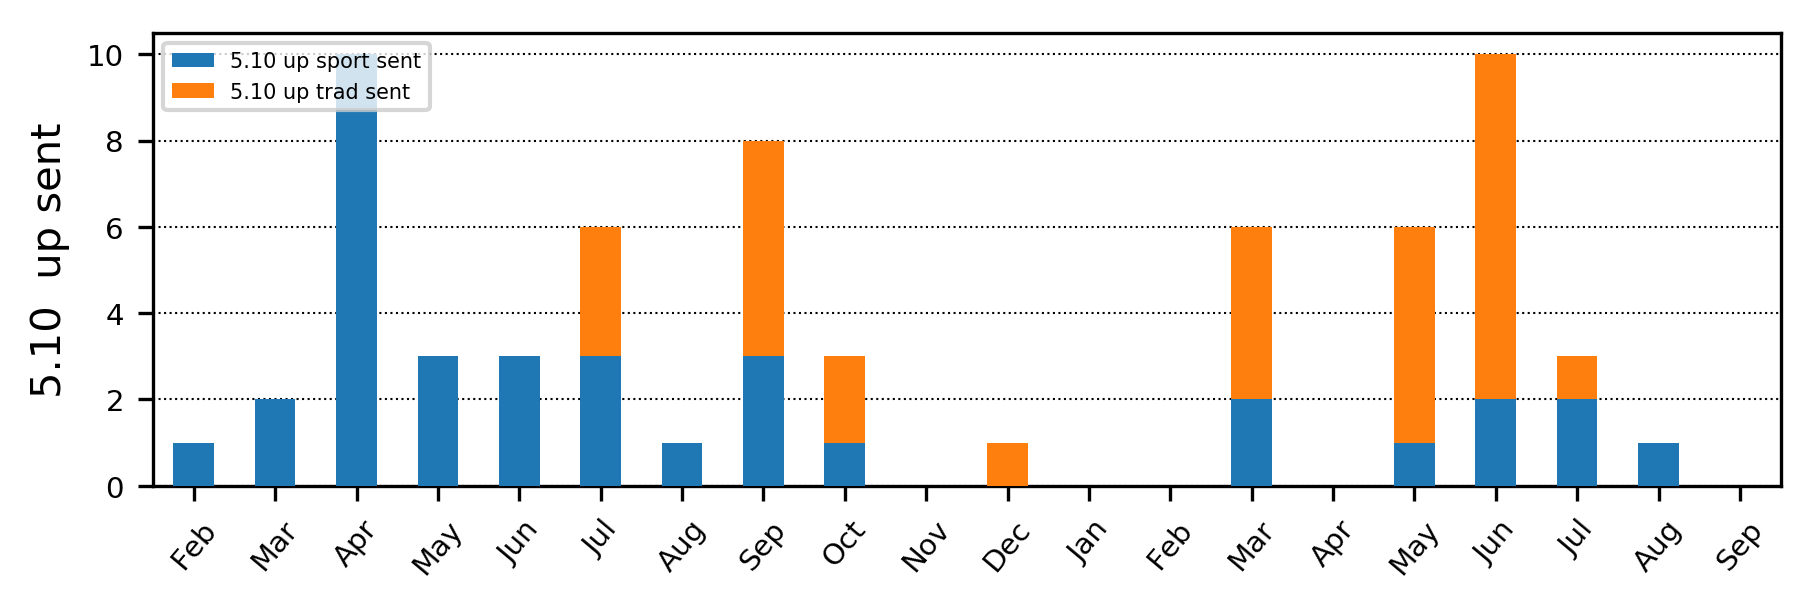

In [49]:
monthStarts = pd.date_range( datetime.datetime(2018,1,1)  , dEnd,  dtype='datetime64[ns]',freq='M'  )  + datetime.timedelta(days=1)
df_m = pd.DataFrame(index=monthStarts,columns= ['Sport Routes Climbed'])
df_m.index.name = 'Month'
monthNames = [item.strftime('%b') for item in df_m.index]

lead = df['lead'] == 1
plt.figure(figsize=(7,2), dpi=300)
ax = plt.gca()
for firstDay in monthStarts:
    this_month = ( df['date']>=firstDay) & ( df['date']< (firstDay+ relativedelta(months=1) ) )
    df_m.loc[firstDay,'all routes climbed'] =  df[(df['style'] < 9)   & this_month ].shape[0]
    is_510send =  (df['style'] > 0) &  (df['style'] < 4)& (df['numeric_grade']>=5.10 )
    
    df_m.loc[firstDay,'5.10 sport'] = df[  this_month & is_510send & (df['type']=='sport')].shape[0]
    df_m.loc[firstDay,'5.10 trad'] = df[  this_month & is_510send & (df['type']=='trad')].shape[0]
     
# df_m.plot.bar( ax=ax, y=['all routes climbed' ], stacked = True, rot=30,zorder=3, alpha = 0.1)
df_m.plot.bar( ax=ax, y=['5.10 sport','5.10 trad'], stacked = True, rot=30,zorder=3)
ax.set_xticklabels(monthNames)
plt.xticks(rotation=m_textang)
ax.legend([ '5.10 up sport sent', '5.10 up trad sent'], prop={'size': 5},loc='upper left')
ax.set_xlabel('')
ax.set_ylabel('5.10  up sent')
ax.tick_params(labelsize=7)
ax.grid(axis='y',linestyle = ':',zorder=0,color = 'k',linewidth=0.5)

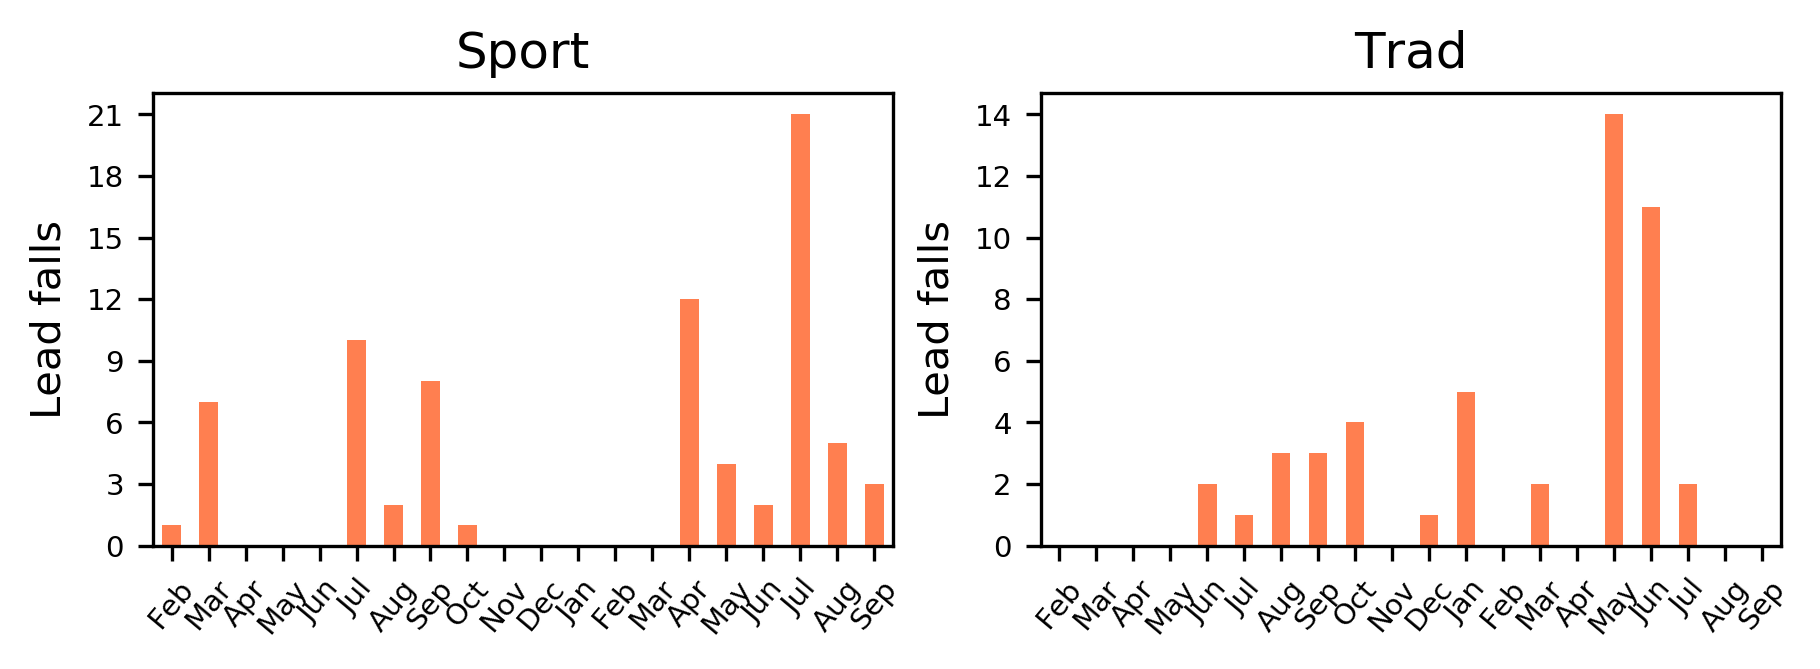

In [50]:
from dateutil.relativedelta import relativedelta

monthStarts = pd.date_range( datetime.datetime(2018,1,1)  , periods = n_months,  dtype='datetime64[ns]',freq='M'   )  + datetime.timedelta(days=1)
df_f = pd.DataFrame(index=monthStarts,columns= ['Sport lead falls','Trad lead falls'])
df_f.index.name = 'Month'
monthNames = [item.strftime('%b') for item in df_f.index]

ax = plt.figure(figsize=(7,2), dpi=300).add_subplot(121) 
for firstDay in monthStarts:
    df_f.loc[firstDay,'Sport lead falls'] = df[ (df['type'] == 'sport') & ( df['date']>=firstDay) & ( df['date']< (firstDay+ relativedelta(months=1) ) ) ]['lead falls'].sum()  
    df_f.loc[firstDay,'Trad lead falls'] = df[ (df['type'] == 'trad') & ( df['date']>=firstDay) & ( df['date']< (firstDay+ relativedelta(months=1) ) ) ]['lead falls'].sum()  

df_f.plot.bar( ax=ax, y='Sport lead falls', rot=30, color='coral')
ax.set_xticklabels(monthNames)
ax.legend_.remove()
ax.set_xlabel('')
plt.xticks(rotation=m_textang)
ax.set_ylabel('Lead falls')
ax.set_title('Sport')
ax.tick_params(labelsize=7)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax2 = plt.subplot(122)
df_f.plot.bar( ax=ax2, y='Trad lead falls' , color='coral')
plt.xticks(rotation=m_textang)
ax2.set_xticklabels(monthNames)
ax2.legend_.remove()
ax2.set_xlabel('')
ax2.set_ylabel('Lead falls')
ax2.set_title('Trad')
ax2.tick_params(labelsize=7)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

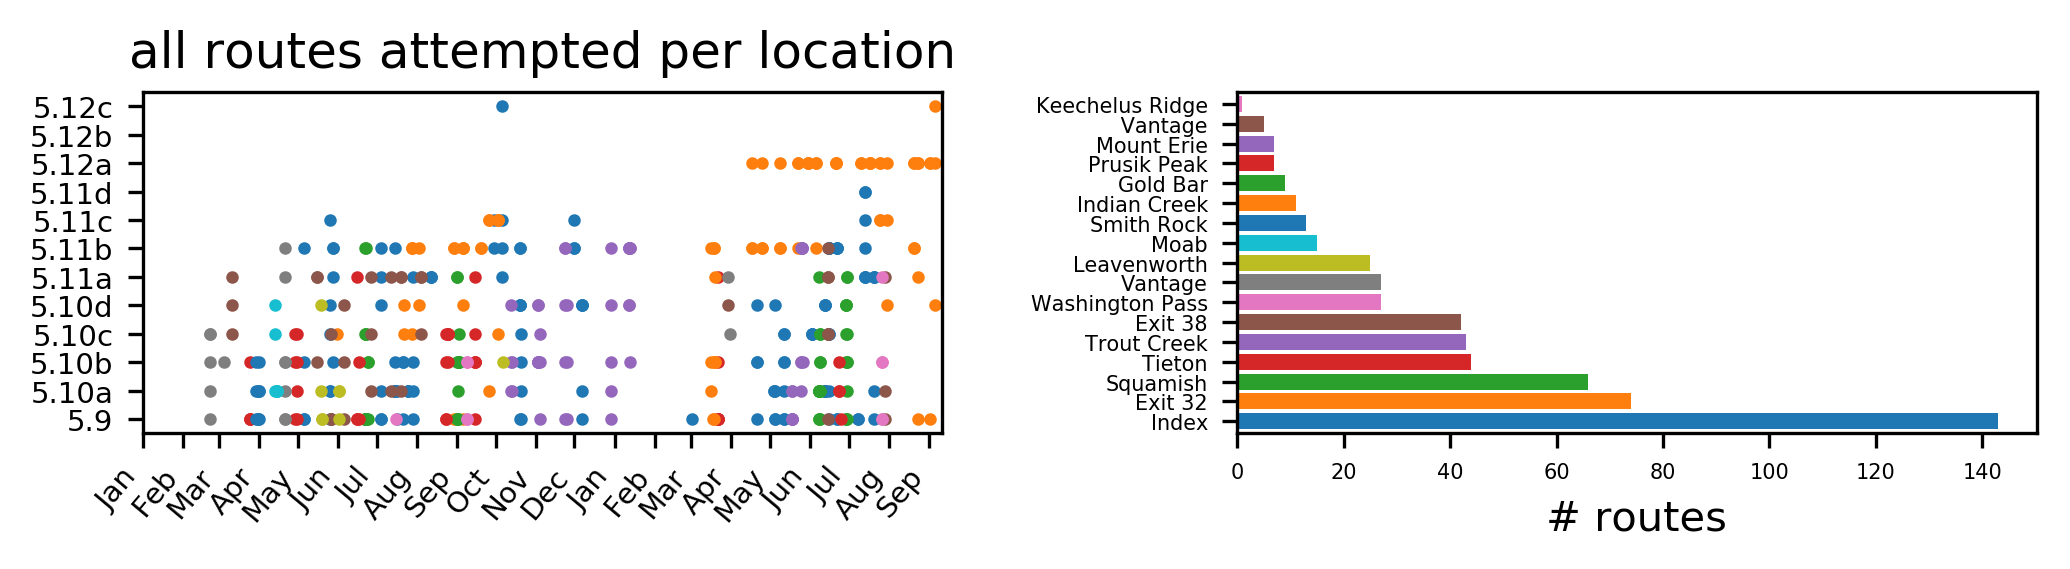

In [107]:
from collections import Counter
letter_counts = Counter(df[(df['style'] <9)].location )
df_l = pd.DataFrame.from_dict(letter_counts, orient ='index')

ax = plt.figure(figsize=(7,2), dpi=300).add_subplot(121) 
 
for loc in df_l.sort_values(0, ascending=False).index: 
    df[ (df['style'] <9)&(df['location'] == loc)].plot(ax=ax, x = 'date',y='numeric_grade', ms=4,style='.', xticks=xticks.to_pydatetime(), yticks = yticks)
ax.legend(df.location.unique())
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.set_yticklabels(yticklabs);
ax.set_ylim( 5.09625,yHigh+0.00125)
ax.set_xlim( dStart,dEnd)
ax.set_xlabel('')
plt.xticks(rotation=m_textang)
ax.set_title('all routes attempted per location')
ax.legend_.remove()
ax.tick_params(labelsize=7)


col_list = plt.rcParams['axes.prop_cycle'].by_key()['color'] +  plt.rcParams['axes.prop_cycle'].by_key()['color'] 

ax2 = plt.subplot(122)
temp = df_l.sort_values(0, ascending=False)
y_pos=np.arange(len(temp))

# df_l.sort_values(0, ascending=False).plot(ax=ax2,kind='barh')
# ax2.legend_.remove()
ax2.barh(y_pos, temp.values[:,0], color = col_list )

ax2.set_ylim(min(y_pos)-0.6, max(y_pos)+0.6)
ax2.set_yticks(y_pos)
ax2.set_yticklabels( temp.index) 
ax2.tick_params(labelsize=5)
ax2.set_xlabel('# routes')
plt.tight_layout()

# len(temp.values[:,0])

# type( plt.rcParams['axes.prop_cycle'].by_key()['color'] ) 

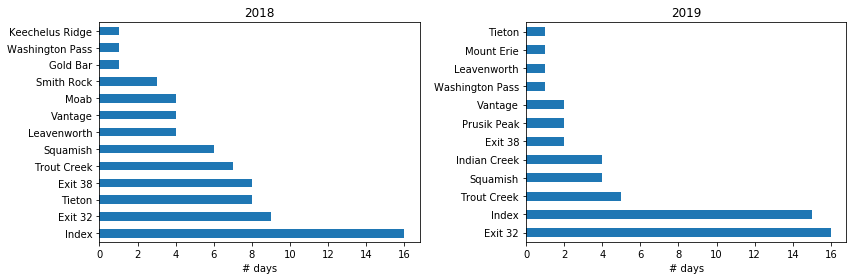

In [20]:
in_2018 = (df['date']>=datetime.datetime(2018,1,1)) & (df['date']<datetime.datetime(2019,1,1))
in_2019 = (df['date']>=datetime.datetime(2019,1,1)) & (df['date']<datetime.datetime(2020,1,1))

climbing_days_2018 = df[in_2018  ]['date'].unique()
climbing_days_2019= df[in_2019  ]['date'].unique()
places_2018 = [] 
places_2019 = []
for day in climbing_days_2018: 
    places_2018.append( df[df['date'] == day].location.unique()[0] )
for day in climbing_days_2019: 
    places_2019.append( df[df['date'] == day].location.unique()[0] ) 
     
df_2019 = pd.DataFrame.from_dict( Counter( places_2018 ) , orient ='index')
df_2018 = pd.DataFrame.from_dict( Counter( places_2019 ) , orient ='index')
  
fig,axs = plt.subplots(1,2,figsize=(12,4))
df_2018.sort_values(0, ascending=False).plot(ax=axs[1],kind='barh', color = plt.rcParams['axes.prop_cycle'].by_key()['color'] )
df_2019.sort_values(0, ascending=False).plot(ax=axs[0],kind='barh', color = plt.rcParams['axes.prop_cycle'].by_key()['color'] )
 
axs[0].legend_.remove()
axs[0].set_xlabel('# days')  
axs[0].set_title('2018')

axs[1].legend_.remove() 
axs[1].set_xlabel('# days') 
axs[1].set_title('2019')
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout() 

In [108]:
df.head()
is_510 = (df['numeric_grade']>=5.10)  
lead  = (df['lead'] == 1) 
trad = (df['type'] == 'trad')
sport = (df['type'] == 'sport')
send = (df['style']>0) & (df['style']<4)  
at_32 = df['location'].str.contains("32") 
multipitch_P5 = df['route'].str.contains("P5") 
in_name = df['route'].str.contains("Lay")
 
# conditions = at_32 & send
conditions = in_name  
 
print( 'number of attempts: ' + str( np.count_nonzero(conditions))   )
df[ conditions]

number of attempts: 5


,route,rating,type,lead,style,lead falls,date,location,Quality (1-5) of performance,notes: 1 = onsight. 2 = flash. 3 = redpoint. 4= re-readpoint. 5 = follow clean/TR.,numeric_grade
1,Lay of the Land,5.12a,sport,1,0,1.0,2019-09-06,Exit 32,3.0,fell going for the horizontal slot,5.12
4,Lay of the Land,5.12a,sport,1,0,1.0,2019-09-02,Exit 32,4.0,One fall after last draw. Ran out of steam due...,5.12
5,Lay of the Land,5.12a,sport,1,0,1.0,2019-09-02,Exit 32,4.0,"Many takes to figure out beta, crux is now mov...",5.12
8,Lay of the Land,5.12a,sport,0,0,0.0,2019-08-24,Exit 32,4.0,figured out beta. way left foothold for step ...,5.12
9,Lay of the Land,5.12a,sport,1,0,0.0,2019-08-24,Exit 32,4.0,careful with grabbing chains!,5.12


In [14]:
print("Total days out in 2018: \n" + 
      "   " +str( len( climbing_days_2018 )  ) )

print("Climbs 2018: \n " + 
      "  trad:" + str( len( df[ (df['style'] <9) & (df['type']=='trad')&in_2018 ]  )  ) +
      "  sport:" + str( len( df[ (df['style'] <9) & (df['type']=='sport')&in_2018 ]  )  ) + 
      "  total: " + str( len( df[ (df['style'] <9) & in_2018 ]  )  )
     )
print("Leads 2018: \n " + 
      "  trad:" + str( len( df[ (df['style'] <9)& (df['lead']==1) & (df['type']=='trad')&in_2018 ]  )  ) +
      "  sport:" + str( len( df[ (df['style'] <9) & (df['lead']==1)& (df['type']=='sport')&in_2018 ]  )  ) +
      "  total: " + str( len( df[ (df['style'] <9)& (df['lead']==1) &in_2018 ]  )  )
     )

print( ' ')  

print("Total days out in 2019: \n" + 
      "   " +str( len( climbing_days_2019 )  ) )

print("Climbs 2019: \n " + 
      "  trad:" + str( len( df[ (df['style'] <9) & (df['type']=='trad')&in_2019 ]  )  ) +
      "  sport:" + str( len( df[ (df['style'] <9) & (df['type']=='sport')&in_2019 ]  )  ) + 
      "  total: " + str( len( df[ (df['style'] <9) & in_2019 ]  )  )
     )
print("Leads 2019: \n " + 
      "  trad:" + str( len( df[ (df['style'] <9)& (df['lead']==1) & (df['type']=='trad')&in_2019 ]  )  ) +
      "  sport:" + str( len( df[ (df['style'] <9) & (df['lead']==1)& (df['type']=='sport')&in_2019 ]  )  ) +
      "  total: " + str( len( df[ (df['style'] <9)& (df['lead']==1) &in_2019]  )  )
     )

Total days out in 2018: 
   72
Climbs 2018: 
   trad:189  sport:111  total: 309
Leads 2018: 
   trad:66  sport:72  total: 138
 
Total days out in 2019: 
   54
Climbs 2019: 
   trad:157  sport:69  total: 243
Leads 2019: 
   trad:66  sport:50  total: 130
